In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
filepath = "../data/Trips_data (cleaned).csv"

df = pd.read_csv(filepath)

df.head()

,PUMFID,REFYEAR,TRIPID,TRIPTYPE,ROS_Q02A,ROS_Q02B,DISTANCE,DISTLONG,DURATION,DUR_MAIN,...,Beach,Hunting,Golfing,Cycling,Snowmobiling,Downhill Skiing/Snowboarding,Cross-country Skiing/Snowshoeing,Play Sports,Other Activity,No Activities
0,1006690,2022,2,5,2,96,46.0,46.0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,1006690,2022,3,5,2,96,63.0,63.0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,3008513,2022,1,4,2,96,847.0,847.0,76,76,...,False,False,False,False,False,False,False,False,False,False
3,1010819,2022,1,6,2,96,83.0,83.0,15,15,...,False,False,False,False,False,False,False,False,False,False
4,1006697,2022,2,5,2,96,NaN,NaN,0,0,...,False,False,False,False,False,False,False,False,False,False


In [4]:
df2 = df[["Total Spending for transport", "Total Spending for food/bevs", "Total spending on shopping",
           "Total spending for activities/entertainment", "SPD_DTOT", "SPD_D06"]]

In [5]:
df.columns

Index(['PUMFID', 'REFYEAR', 'TRIPID', 'TRIPTYPE', 'ROS_Q02A', 'ROS_Q02B',
       'DISTANCE', 'DISTLONG', 'DURATION', 'DUR_MAIN', 'DUR_LEG', 'GEND_BIN',
       'INCOMGR2', 'GNCQ06A', 'GNCQ06B', 'GN_Q06C', 'PKD_Q01',
       'Gave actual amounts?', 'SPD_D02', 'SPD_D03', 'SPD_D04', 'SPD_D05',
       'Total Spending for transport', 'SPD_D06', 'SPD_D07', 'SPD_D08',
       'Total Spending for food/bevs', 'SPD_D09', 'SPD_D10',
       'Total spending for activities/entertainment', 'SPD_D11', 'SPD_D12',
       'Total spending on shopping', 'SPD_DTOT', 'VSD1_Q01', 'VSD1_Q02',
       'LGD_Q01', 'TRIP_LEG', 'WPT', 'WT', 'Quarter', 'Origin Province',
       'Destination Province', 'Destination Region', 'Destination Metro Area',
       'Age Range', 'Main Reason', 'Main Transportation Method',
       'Visit Friends & Family', 'Shopping', 'Sightseeing',
       'Museum/Art Gallery', 'Historic site', 'Zoo/Aquarium',
       'Sprts Event as Spectator', 'Festival or Fair',
       'Performance such as Play o

In [30]:
df2.describe()

,Total Spending for transport,Total Spending for food/bevs,Total spending on shopping,Total spending for activities/entertainment,SPD_DTOT,SPD_D06
count,47141.000000,47141.000000,47141.000000,47141.000000,47141.000000,14507.000000
mean,167.897054,121.874441,46.203708,50.065824,505.492225,388.160819
std,610.115720,222.495559,262.073779,174.584086,1091.163565,690.088130
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,0.000000,0.000000,0.000000,75.000000,0.000000
50%,70.000000,50.000000,0.000000,0.000000,185.000000,180.000000
75%,143.000000,150.000000,0.000000,20.000000,500.000000,500.000000
max,78700.000000,6000.000000,25050.000000,10777.000000,79003.000000,15200.000000


<Axes: xlabel='SPD_DTOT', ylabel='Count'>

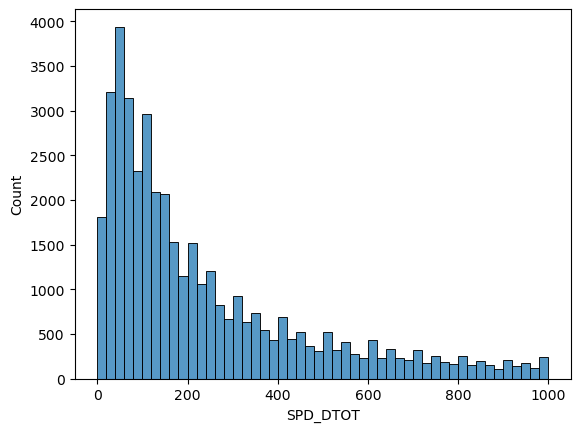

In [6]:
sns.histplot(df2['SPD_DTOT'], bins=50, binrange=[0, 1000])

<Axes: xlabel='SPD_D06', ylabel='Count'>

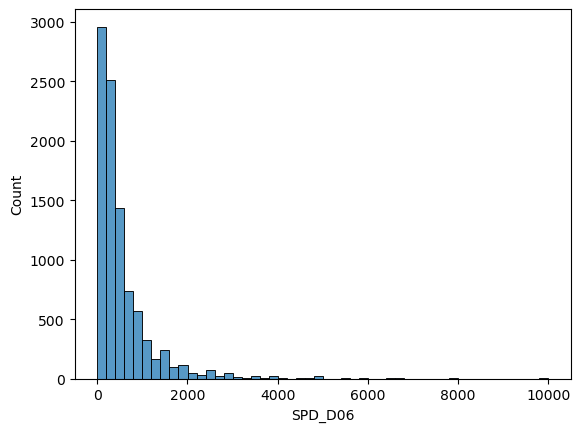

In [7]:
sns.histplot(df2['SPD_D06'], bins=50, binrange=[1, 10000])

In [8]:
qp_20 = []
qp_50 = []
qp_100 = []

for i in range(0, 101):
    qp_100.append(0.01*i)
    if (i < 51):
        qp_50.append(0.02*i)
        if (i < 21):
            qp_20.append(0.05*i)

In [9]:
df2.columns

Index(['Total Spending for transport', 'Total Spending for food/bevs',
       'Total spending on shopping',
       'Total spending for activities/entertainment', 'SPD_DTOT', 'SPD_D06'],
      dtype='object')

In [10]:
transport_q100 = df2['Total Spending for transport'].quantile(q=qp_100,  interpolation='lower').values
food_q100 = df2['Total Spending for food/bevs'].quantile(q=qp_100,  interpolation='lower').values
shopping_q100 = df2['Total spending on shopping'].quantile(q=qp_100,  interpolation='lower').values
activities_q100 = df2['Total spending for activities/entertainment'].quantile(q=qp_100,  interpolation='lower').values
total_q100 = df2['SPD_DTOT'].quantile(q=qp_100,  interpolation='lower').values
accomodations_q100 = df2['SPD_D06'].quantile(q=qp_100,  interpolation='lower').values

In [11]:
transport_q20 = df2['Total Spending for transport'].quantile(q=qp_20,  interpolation='lower').values
food_q20 = df2['Total Spending for food/bevs'].quantile(q=qp_20,  interpolation='lower').values
shopping_q20 = df2['Total spending on shopping'].quantile(q=qp_20,  interpolation='lower').values
activities_q20 = df2['Total spending for activities/entertainment'].quantile(q=qp_20,  interpolation='lower').values
total_q20 = df2['SPD_DTOT'].quantile(q=qp_20,  interpolation='lower').values
accomodations_q20 = df2['SPD_D06'].quantile(q=qp_20,  interpolation='lower').values

In [12]:
transport_q50 = df2['Total Spending for transport'].quantile(q=qp_50,  interpolation='lower').values
food_q50 = df2['Total Spending for food/bevs'].quantile(q=qp_50,  interpolation='lower').values
shopping_q50 = df2['Total spending on shopping'].quantile(q=qp_50,  interpolation='lower').values
activities_q50 = df2['Total spending for activities/entertainment'].quantile(q=qp_50,  interpolation='lower').values
total_q50 = df2['SPD_DTOT'].quantile(q=qp_50,  interpolation='lower').values
accomodations_q50 = df2['SPD_D06'].quantile(q=qp_50,  interpolation='lower').values

In [22]:
total_q20n = []
total_q50n = []
total_q100n = []

for i in range(0, 100):
    if (total_q100[i] != total_q100[i+1]) :
        total_q100n.append("$" + str(total_q100[i]) + "-$" + str(total_q100[i+1]))
    if (i < 50):
        if (total_q50[i] != total_q50[i+1]) :
            total_q50n.append("$" + str(total_q50[i]) + "-$" + str(total_q50[i+1]))
        if (i < 20):
                if (total_q20[i] != total_q20[i+1]) :
                    total_q20n.append("$" + str(total_q20[i]) + "-$" + str(total_q20[i+1]))

In [21]:
total_q50n


['$0-$5',
 '$5-$20',
 '$20-$20',
 '$20-$30',
 '$30-$35',
 '$35-$40',
 '$40-$47',
 '$47-$50',
 '$50-$52',
 '$52-$60',
 '$60-$65',
 '$65-$72',
 '$72-$80',
 '$80-$85',
 '$85-$95',
 '$95-$100',
 '$100-$100',
 '$100-$110',
 '$110-$120',
 '$120-$130',
 '$130-$140',
 '$140-$150',
 '$150-$160',
 '$160-$170',
 '$170-$185',
 '$185-$200',
 '$200-$210',
 '$210-$230',
 '$230-$250',
 '$250-$265',
 '$265-$288',
 '$288-$308',
 '$308-$340',
 '$340-$366',
 '$366-$400',
 '$400-$440',
 '$440-$480',
 '$480-$530',
 '$530-$587',
 '$587-$650',
 '$650-$719',
 '$719-$805',
 '$805-$920',
 '$920-$1050',
 '$1050-$1225',
 '$1225-$1467',
 '$1467-$1800',
 '$1800-$2330',
 '$2330-$3400',
 '$3400-$79003']

In [29]:
df2['Total Bins (20)'] = pd.cut(df['SPD_DTOT'], total_q20, labels=total_q20n, duplicates='drop', include_lowest=True)
df2['Total Bins (50)'] = pd.cut(df['SPD_DTOT'], total_q50, labels=total_q50n, duplicates='drop', include_lowest=True)
df2['Total Bins (100)'] = pd.cut(df['SPD_DTOT'], total_q100, labels=total_q100n, duplicates='drop', include_lowest=True)

C:\Users\carte\AppData\Local\Temp\ipykernel_14232\4183936793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total Bins (20)'] = pd.cut(df['SPD_DTOT'], total_q20, labels=total_q20n, duplicates='drop', include_lowest=True)
C:\Users\carte\AppData\Local\Temp\ipykernel_14232\4183936793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total Bins (50)'] = pd.cut(df['SPD_DTOT'], total_q50, labels=total_q50n, duplicates='drop', include_lowest=True)
C:\Users\carte\AppData\Local\Temp\ipykernel_14232\

In [28]:
total_q20n

['$0-$20',
 '$20-$35',
 '$35-$50',
 '$50-$60',
 '$60-$75',
 '$75-$95',
 '$95-$110',
 '$110-$130',
 '$130-$150',
 '$150-$185',
 '$185-$220',
 '$220-$265',
 '$265-$322',
 '$322-$400',
 '$400-$500',
 '$500-$650',
 '$650-$862',
 '$862-$1225',
 '$1225-$2024',
 '$2024-$79003']